In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

if keras.backend.backend() != 'tensorflow':
    print("This notebook is for tensorflow backend. There might be problems with other backends")
else:
    print("Using tensorflow backend")
print("Keras {}, TensorFlow {}".format(keras.__version__, keras.backend.tf.__version__))

Using TensorFlow backend.


Using tensorflow backend
Keras 2.0.4, TensorFlow 1.1.0


# Load Datasets

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [4]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

In [5]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [6]:
train_y_onehot = keras.utils.to_categorical(train_y, 10)
test_y_onehot = keras.utils.to_categorical(test_y, 10)

Sample shape: (28, 28, 1)
Sample target: 5


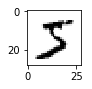

In [7]:
# See one example
print("Sample shape: {}".format(train_x[0].shape))
print("Sample target: {}".format(train_y[0]))
plt.figure(figsize=(1,1))
plt.imshow(train_x[0].reshape(28,28)).set_cmap('Greys')

# Model definition

In [8]:
def model_cnn():
    model = keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

### Testing that the initial model works

In [9]:
model = model_cnn()
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
model.predict(np.array([train_x[0]]))

array([[ 0.10947706,  0.09472241,  0.10212667,  0.09638931,  0.09457237,
         0.10436951,  0.10076497,  0.10075623,  0.1044464 ,  0.09237508]], dtype=float32)

### Accuracy testing

We should have now model with random accuracy

In [11]:
loss, accuracy = model.evaluate(test_x, test_y_onehot, verbose=1)
accuracy

 9376/10000 [===========================>..] - ETA: 0s

0.060400000000000002

In [12]:
%%timeit -r 3
print(model.evaluate(test_x, test_y_onehot, verbose=0))

[2.303894536972046, 0.060400000000000002]
[2.303894536972046, 0.060400000000000002]
[2.303894536972046, 0.060400000000000002]
[2.303894536972046, 0.060400000000000002]
355 ms ± 6.03 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


### Training the model

In [13]:
history = model.fit(train_x, train_y_onehot,
                      batch_size=32, epochs=3, verbose=1,
                      validation_data=(test_x, test_y_onehot))
print("End accuracy: " + str(history.history['acc'][-1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s - loss: 0.1052 - acc: 0.9677 - val_loss: 0.0322 - val_acc: 0.9897
Epoch 2/3
60000/60000 [==============================] - 6s - loss: 0.0359 - acc: 0.9887 - val_loss: 0.0351 - val_acc: 0.9896
Epoch 3/3
60000/60000 [==============================] - 6s - loss: 0.0253 - acc: 0.9919 - val_loss: 0.0344 - val_acc: 0.9890
End accuracy: 0.9919


# Save & Load & Predict

### Saving

In [14]:
model_dir = './data/keras_model'
import os
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [15]:
saved_model_path = model_dir + '/full_model_' + str(len(history.epoch)) + ".h5"
saved_model_path

'./data/keras_model/full_model_3.h5'

In [16]:
model.save_weights(saved_model_path)

### Loading

In [17]:
loaded_model = model_cnn()
loaded_model.load_weights(saved_model_path)

### Predicting

6 (softmax: 0.9999986886978149, correct: True)


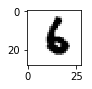

In [22]:
test_img_idx = int(np.random.random()*100)
result = loaded_model.predict(np.array([train_x[test_img_idx]]))

result_class = np.argmax(result)
result_correct = result_class == train_y[test_img_idx]
print("{} (softmax: {}, correct: {})".format(result_class, result[0][result_class], result_correct))
plt.figure(figsize=(1,1))
plt.imshow(train_x[test_img_idx].reshape(28,28)).set_cmap('Greys')

# Debugging

In [19]:
# Displaying an overview of the current model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total para